In [7]:
# Import the desired libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from collections import Counter


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [50]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize.regexp import RegexpTokenizer
import string

# Sample dataset
text = """This is a simple example of creating a vocabulary dictionary.
The GloVe algorithm is a powerful method for creating word glove embeddings and is widely used in natural language processing tasks.
A vocabulary dictionary is an important step in the GloVe algorithm."""

# Remove stopwords and punctuations - This was the additional step I had to perform to get the desired output.
stop_words = set(stopwords.words('english'))
filtered_text = ' '.join([word for word in word_tokenize(text) if word.lower() not in stop_words and word not in string.punctuation])

# Tokenize the text
tokens = nltk.word_tokenize(filtered_text)

# Count the frequency of each word
word_counts = Counter(tokens)

# Arrange the words in decreasing order of frequency
sorted_vocab = sorted(word_counts, key=word_counts.get, reverse=True)

# set threshold and filter out infrequent words
# I had to set this value to 0 to det the desired output as mentioned in the blog post.
threshold = 0
filtered_vocab = [word for word in sorted_vocab if word_counts[word] > threshold]

# create the vocabulary dictionary
vocab_dictionary = {word: i+1 for i, word in enumerate(filtered_vocab)}

#printing the dictionary
print(vocab_dictionary)


{'creating': 1, 'vocabulary': 2, 'dictionary': 3, 'GloVe': 4, 'algorithm': 5, 'simple': 6, 'example': 7, 'powerful': 8, 'method': 9, 'word': 10, 'glove': 11, 'embeddings': 12, 'widely': 13, 'used': 14, 'natural': 15, 'language': 16, 'processing': 17, 'tasks': 18, 'important': 19, 'step': 20}


In [ ]:
# As I had already downloaded and uploaded the glove.6b.100d.txt file to Drive I am using that file.

# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove*.zip


In [22]:
import numpy as np
vocab = {}
with open('/content/drive/MyDrive/Colab Notebooks/Sem 2 - NLP Class/a2_glove.6B.100d.txt', 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vec = np.asarray(values[1:], dtype='float32')
        vocab[word] = vec
print(f'Loaded {len(vocab)} word vectors')

Loaded 400000 word vectors


In [51]:
# To find the nearest neighbors of a word - using the Euclidean distance (or cosine similarity) between two-word vectors.
def find_nearest(word, vocab, k=5):
  distances = []
  word_vec = vocab[word]
  for w, vec in vocab.items():
    distance = np.linalg.norm(word_vec - vec)
    distances.append((w, distance))
  distances = sorted(distances, key=lambda x: x[1])
  return distances[:k]

print(find_nearest('cat', vocab))


[('cat', 0.0), ('dog', 2.6811306), ('rabbit', 3.6489706), ('cats', 3.6892002), ('monkey', 3.7469325)]


In [54]:
# To find the analogy between words - similarity metrics used for nearest neighbor evaluations.
def find_analogy(a, b, c, vocab):
  a_vec = vocab[a]
  b_vec = vocab[b]
  c_vec = vocab[c]
  d_vec = b_vec - a_vec + c_vec
  distances = []
  for w, vec in vocab.items():
    distance = np.linalg.norm(d_vec - vec)
    distances.append((w, distance))
  distances = sorted(distances, key=lambda x: x[1])
  return distances[:1]

print(find_analogy('king', 'man', 'queen', vocab))


[('woman', 4.0810785)]


In [56]:
print(find_analogy('paris', 'france', 'tokyo', vocab))

[('japan', 3.220869)]


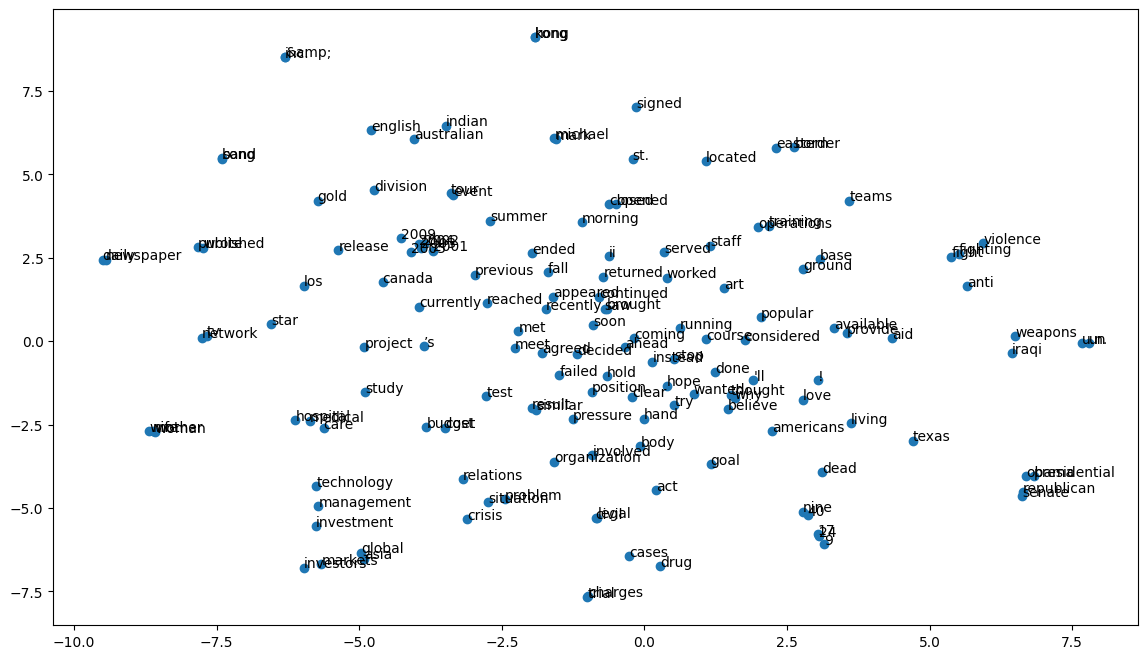

In [58]:
# Visualization - relationships between the words in the vocabulary based on their word vectors
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'vocab' is your vocabulary dictionary
words = list(vocab.keys())
vectors = np.array([vocab[word] for word in words])  # Convert to NumPy array

# Assuming you have 'y' and 'words' properly defined
tnse = TSNE(n_components=2)
y = tnse.fit_transform(vectors[700:850])

plt.figure(figsize=(14, 8))
plt.scatter(y[:, 0], y[:, 1])

for label, x, y in zip(words[700:850], y[:, 0], y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')

plt.show()